This cell imports the necessary libraries

In [1]:
import pandas as pd
import os
from datetime import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt

This cell gets the current working directory, where you should save the csv file you want to analyse

In [2]:
cwd = os.getcwd()

Enter the file name here:

In [3]:
results_log = "Results log.csv"

This cell creates the directory of the file we will read

In [4]:
directory = os.path.join(cwd, results_log)

This cell reads in the csv files and creates a DataFrame (pandas)

In [5]:
results_df = pd.read_csv(directory)

This cell formats the data from the 'Date' column to extract YYYYMMDD to year = YYYY, month = MM, day = DD and adds 3 columns to the end with these values

In [6]:
results_df["year"] = results_df["Date"].map(str).str[:4]
results_df["month"] = results_df["Date"].map(str).str[4:6]
results_df["day"] = results_df["Date"].map(str).str[6:]

This cell removes underscores from the video time values, and adds another column to the end with these values

In [7]:
results_df["time"] = pd.DataFrame(results_df["Video time"].map(str).str.replace("_",""))

This cell formats the data from the 'Video time' column to extract HHMMSS to hour = HH, minute = MM, second = SS and adds 3 columns to the end with these values

In [8]:
results_df["hour"] = results_df["time"].map(str).str[:2]
results_df["minute"] = results_df["time"].map(str).str[2:4]
results_df["second"] = results_df["time"].map(str).str[4:]

Where the number of characters in the Video time column is more than 6, this row of data will be removed (dropped) from the DataFrame

In [9]:
results_df = results_df.drop(results_df[results_df["time"].str.len() > 6].index)

A final column with title "Data aware" is added, in which the Year, Month, Day values are added to form a datetime datatype

In [10]:
results_df["Date aware"] = pd.to_datetime(results_df["year"] + results_df["month"] + results_df["day"])

A plot of the data is generated, using the "Date aware" data with 1 value added for each row of data

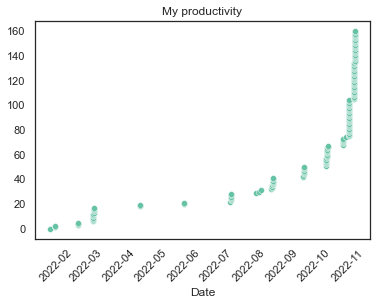

In [26]:
sns.set_theme(style="white", palette="Set2")
productivity = sns.scatterplot(data=results_df, x="Date aware", y=range(0,161))
productivity.set(xlabel ="Date", ylabel = "", title ='My productivity')
productivity.tick_params(axis='x', rotation=45)

The data in the hour column is converted to an integer type. The number of hours above and below 13 (1PM) are counted

In [12]:
results_df["hour"] = results_df["hour"].astype(int)
morning = results_df[results_df["hour"] < 13].count()
afternoon = results_df[results_df["hour"] > 13].count()
morning = morning[0]
afternoon = afternoon[0]

A list of the morning and afternoon values is created. A list of the labels of the data is created.

In [13]:
compare_morn_aft = [morning, afternoon]
labels = ["Morning", "Afternoon"]

The colour palette of the pie chart is set. The date, labels, colours, percentage display, start angle are set.

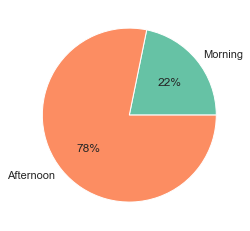

In [28]:
colors = sns.color_palette("Set2")[0:3]
plt.pie(compare_morn_aft, labels = labels, colors = colors, autopct='%.0f%%', startangle=0)
plt.show()